<a href="https://colab.research.google.com/github/DhatriPriya/DhatriPriya_INFO5731_Fall2021/blob/main/AMIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mkaing all the requried imports
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('amia_cleaned.csv')
data.head()

,pmc_id,title,authors,authors_information,year,abstract
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",2021.0,white matter hyperintensities wmh mri reported...
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",2021.0,mild behavioral impairment mbi subjective cogn...
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",2021.0,recently gene therapy onasemnogene abeparvovec...
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",2021.0,exists considerable variation disease progress...
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",2021.0,proposed amyloidβ aβ play causal role alzheime...


In [ ]:
#wE already have the cleaned d
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:

for text in data["abstract"]:
  #tokens=word_tokenize(text)
  #pos=nltk.pos_tag(tokens)
  #newtext=(" ").join(val for val in tokens if val.lower() not in stopwords.words("english"))
  pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
  def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
data['POS tagged'] = data['abstract'].apply(str).apply(token_stop_pos)
data.head()

,pmc_id,title,authors,authors_information,year,abstract,POS tagged
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",2021.0,white matter hyperintensities wmh mri reported...,"[(white, a), (matter, n), (hyperintensities, n..."
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",2021.0,mild behavioral impairment mbi subjective cogn...,"[(mild, a), (behavioral, a), (impairment, n), ..."
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",2021.0,recently gene therapy onasemnogene abeparvovec...,"[(recently, r), (gene, n), (therapy, n), (onas..."
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",2021.0,exists considerable variation disease progress...,"[(exists, n), (considerable, a), (variation, n..."
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",2021.0,proposed amyloidβ aβ play causal role alzheime...,"[(proposed, v), (amyloidβ, n), (aβ, n), (play,..."


In [ ]:
data[["abstract", "POS tagged"]]

,abstract,POS tagged
0,white matter hyperintensities wmh mri reported...,"[(white, a), (matter, n), (hyperintensities, n..."
1,mild behavioral impairment mbi subjective cogn...,"[(mild, a), (behavioral, a), (impairment, n), ..."
2,recently gene therapy onasemnogene abeparvovec...,"[(recently, r), (gene, n), (therapy, n), (onas..."
3,exists considerable variation disease progress...,"[(exists, n), (considerable, a), (variation, n..."
4,proposed amyloidβ aβ play causal role alzheime...,"[(proposed, v), (amyloidβ, n), (aβ, n), (play,..."
...,...,...
5077,several basic strategy may employed design new...,"[(several, a), (basic, a), (strategy, n), (may..."
5078,microcomputerbased nuclear submarine ready fle...,"[(microcomputerbased, v), (nuclear, a), (subma..."
5079,substantial portion record historical nature p...,"[(substantial, a), (portion, n), (record, n), ..."
5080,computeraided interactive game developed joint...,"[(computeraided, v), (interactive, a), (game, ..."


In [ ]:
#Getting the steam words
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,pmc_id,title,authors,authors_information,year,abstract,POS tagged,Lemma
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",2021.0,white matter hyperintensities wmh mri reported...,"[(white, a), (matter, n), (hyperintensities, n...",white matter hyperintensities wmh mri report...
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",2021.0,mild behavioral impairment mbi subjective cogn...,"[(mild, a), (behavioral, a), (impairment, n), ...",mild behavioral impairment mbi subjective co...
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",2021.0,recently gene therapy onasemnogene abeparvovec...,"[(recently, r), (gene, n), (therapy, n), (onas...",recently gene therapy onasemnogene abeparvov...
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",2021.0,exists considerable variation disease progress...,"[(exists, n), (considerable, a), (variation, n...",exists considerable variation disease progre...
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",2021.0,proposed amyloidβ aβ play causal role alzheime...,"[(proposed, v), (amyloidβ, n), (aβ, n), (play,...",propose amyloidβ aβ play causal role alzheim...


In [ ]:
data[["abstract", "Lemma"]]

,abstract,Lemma
0,white matter hyperintensities wmh mri reported...,white matter hyperintensities wmh mri report...
1,mild behavioral impairment mbi subjective cogn...,mild behavioral impairment mbi subjective co...
2,recently gene therapy onasemnogene abeparvovec...,recently gene therapy onasemnogene abeparvov...
3,exists considerable variation disease progress...,exists considerable variation disease progre...
4,proposed amyloidβ aβ play causal role alzheime...,propose amyloidβ aβ play causal role alzheim...
...,...,...
5077,several basic strategy may employed design new...,several basic strategy may employ design new...
5078,microcomputerbased nuclear submarine ready fle...,microcomputerbased nuclear submarine ready f...
5079,substantial portion record historical nature p...,substantial portion record historical nature...
5080,computeraided interactive game developed joint...,computeraided interactive game develop joint...


In [ ]:
from textblob import TextBlob
def getPolarity(review):
  return TextBlob(review).sentiment.polarity
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
newd1=pd.DataFrame(data[["abstract", "Lemma"]])
newd1['Polarity'] = newd1['Lemma'].apply(getPolarity) 
newd1['Analysis'] = newd1['Polarity'].apply(analysis)
newd1.head()

,abstract,Lemma,Polarity,Analysis
0,white matter hyperintensities wmh mri reported...,white matter hyperintensities wmh mri report...,0.166667,Positive
1,mild behavioral impairment mbi subjective cogn...,mild behavioral impairment mbi subjective co...,0.144444,Positive
2,recently gene therapy onasemnogene abeparvovec...,recently gene therapy onasemnogene abeparvov...,0.366667,Positive
3,exists considerable variation disease progress...,exists considerable variation disease progre...,0.100000,Positive
4,proposed amyloidβ aβ play causal role alzheime...,propose amyloidβ aβ play causal role alzheim...,0.000000,Neutral


In [ ]:
Number_count= newd1.Analysis.value_counts()
print(Number_count)

Positive    3352
Negative    1334
Neutral      396
Name: Analysis, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


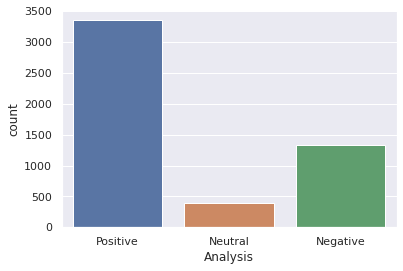

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
newd1.Analysis
pic=sns.countplot(x="Analysis",data=newd1)
print(pic)